In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn import datasets
iris = datasets.load_iris()

In [3]:
samples = iris.data
labels = iris.target

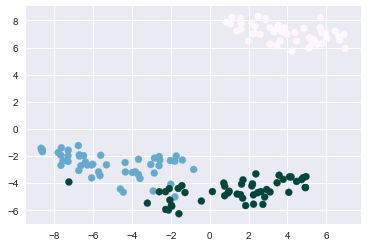

In [5]:
from sklearn.manifold import TSNE
model = TSNE(learning_rate=100)
transformed = model.fit_transform(samples)
xs = transformed[:,0]
ys = transformed[:,1]
plt.scatter(xs, ys, c=labels, cmap='PuBuGn')
plt.show()

Dimension reduction

- PCA - principle component analysis

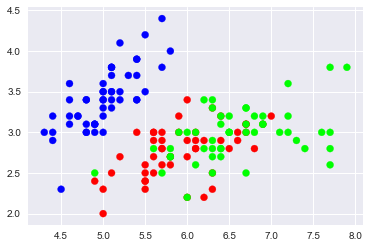

In [12]:
plt.scatter(samples[:,0], samples[:,1], c=labels, cmap='brg')

#### PCA - decorrelation. Разворот данных вдоль осей, сдвиг на Mean=0, декорреляция

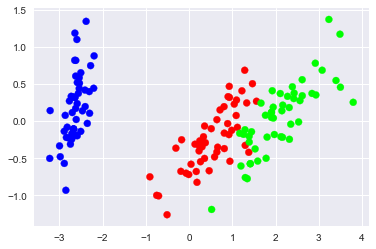

In [11]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)
transformed = model.transform(samples)
plt.scatter(transformed[:,0], transformed[:,1], c=labels, cmap='brg')

In [20]:
sum = 0
for i in range(4):
    a = transformed[:,i].mean()
    print(a)
    sum += a
print(sum)

-2.84217094304e-15
-8.28966525053e-16
-2.01320441799e-16
6.58362253603e-16
-3.21409565629e-15


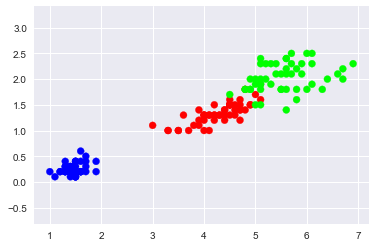

0.962757097051


In [23]:
# Perform the necessary imports
from scipy.stats import pearsonr

# Assign the 0th column of grains: width
width = samples[:,2]

# Assign the 1st column of grains: length
length = samples[:,3]

# Scatter plot width vs length
plt.scatter(width, length, c=labels, cmap='brg')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)

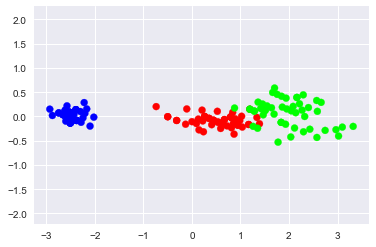

4.09336827676e-17


In [28]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()
source_data = samples[:, 2:4]

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(samples[:, 2:4])

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys, c=labels, cmap='brg')
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

действительная размерность - кол-во действительно независимых фич (существенно вариативных)

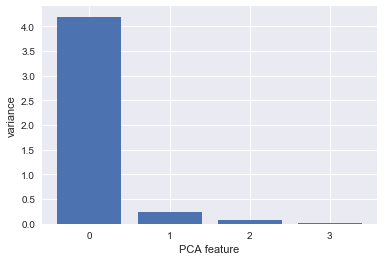

In [36]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(samples)
features = range(pca.n_components_)
plt.bar([0,1,2,3], pca.explained_variance_)
plt.xticks(features)
plt.ylabel('variance')
plt.xlabel('PCA feature')
plt.show()

In [33]:
pca.explained_variance_

array([ 3.66194262,  0.23937427,  0.05898089])

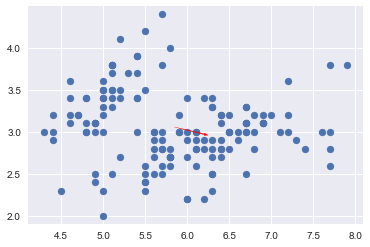

In [38]:
# Make a scatter plot of the untransformed points
plt.scatter(samples[:,0], samples[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(samples[:,:2])

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

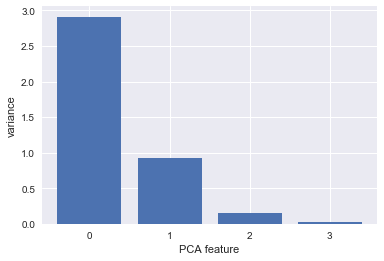

In [39]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()


#### Dimension Reduction

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(samples)
transformed = pca.transform(samples)
print(transformed.shape)

(150, 2)


In [44]:
from sklearn.decomposition import TruncatedSVD # for sparse csr_matrixes

#### Non-negative matrix factorization (NMF) - также уменьшение размерности

In [45]:
from sklearn.decomposition import NMF
model=NMF(n_components=2)
model.fit(samples)
nmf_features = model.transform(samples)

In [46]:
nmf_features

array([[ 0.10534643,  1.32900316],
       [ 0.13521971,  1.17474412],
       [ 0.10169058,  1.21426258],
       [ 0.14176706,  1.124735  ],
       [ 0.09732646,  1.33658651],
       [ 0.15151672,  1.37778596],
       [ 0.11237879,  1.20927904],
       [ 0.12793372,  1.26382737],
       [ 0.13447406,  1.06743877],
       [ 0.13837186,  1.18701479],
       [ 0.11410037,  1.40291973],
       [ 0.14250103,  1.20623492],
       [ 0.12598076,  1.17054256],
       [ 0.0662085 ,  1.16049624],
       [ 0.04779945,  1.61506745],
       [ 0.08812599,  1.59736891],
       [ 0.08155995,  1.4751931 ],
       [ 0.11312444,  1.31658439],
       [ 0.15468055,  1.41586207],
       [ 0.11093654,  1.36484363],
       [ 0.16875585,  1.28160514],
       [ 0.12527359,  1.32822117],
       [ 0.02152594,  1.36751231],
       [ 0.19426611,  1.17028412],
       [ 0.19496861,  1.13317956],
       [ 0.17165903,  1.14266088],
       [ 0.16097894,  1.21463803],
       [ 0.12429656,  1.32127171],
       [ 0.1133664 ,

In [47]:
articles = pd.read_csv('./data/wiki/wikipedia-vectors.csv')

,Unnamed: 0,HTTP 404,Alexa Internet,Internet Explorer,HTTP cookie,Google Search,Tumblr,Hypertext Transfer Protocol,Social search,Firefox,...,Chad Kroeger,Nate Ruess,The Wanted,Stevie Nicks,Arctic Monkeys,Black Sabbath,Skrillex,Red Hot Chili Peppers,Sepsis,Adam Levine
0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.008878,0.0,0.0,0.049502,0.000000,0.00000,0.0
1,1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00611,0.0
2,2,0.0,0.029607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0
3,3,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.005646,0.00000,0.0
4,4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.00000,0.0


In [49]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
print(nmf_features)

[[  0.00000000e+00   7.73060952e-03   0.00000000e+00   0.00000000e+00
    5.07432082e-03   0.00000000e+00]
 [  1.07329286e-03   8.06980151e-04   0.00000000e+00   0.00000000e+00
    0.00000000e+00   5.35472164e-04]
 [  2.14658571e-03   0.00000000e+00   6.56494739e-03   2.98006958e-05
    4.41919564e-03   7.68651763e-03]
 ..., 
 [  1.40837488e+01   0.00000000e+00   3.06688449e-03   0.00000000e+00
    1.84071136e-03   2.57312298e-04]
 [  1.40848221e+01   0.00000000e+00   1.22056639e-04   0.00000000e+00
    7.68751350e-03   9.52152732e-04]
 [  1.40858954e+01   0.00000000e+00   0.00000000e+00   0.00000000e+00
    0.00000000e+00   0.00000000e+00]]


In [52]:
titles = articles.columns

In [ ]:
# Import pandas
import pandas as pd

# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])